In [1]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("PREDICCIÓN.csv")

In [4]:
df.head(2)

,Player,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,NBA
0,A'Daeron Duncan,33.0,22.4,6.2,0.361,0.255,0.768,1.2,2.5,3.6,1.3,0.9,0.4,1.6,1.6,No
1,A'Torey Everett,24.0,9.7,2.4,0.386,0.571,0.800,0.1,0.8,0.9,0.7,0.1,0.0,0.8,1.4,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31457 entries, 0 to 31456
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  31457 non-null  object 
 1   GP      31457 non-null  float64
 2   MPG     31457 non-null  float64
 3   PPG     31457 non-null  float64
 4   FG%     31457 non-null  float64
 5   3P      31457 non-null  float64
 6   FT%     31457 non-null  float64
 7   ORB     31457 non-null  float64
 8   DRB     31457 non-null  float64
 9   RPG     31457 non-null  float64
 10  APG     31457 non-null  float64
 11  SPG     31457 non-null  float64
 12  BPG     31457 non-null  float64
 13  TOV     31457 non-null  float64
 14  PF      31457 non-null  float64
 15  NBA     31457 non-null  object 
dtypes: float64(14), object(2)
memory usage: 3.8+ MB


In [6]:
print(df.isnull().sum())
print("-----------------------")

print("observamos que nuestro dataset carece de algún valor nulo, algo que ya habíamos previsto dado que hemos realizado una limpieza anterior")

Player    0
GP        0
MPG       0
PPG       0
FG%       0
3P        0
FT%       0
ORB       0
DRB       0
RPG       0
APG       0
SPG       0
BPG       0
TOV       0
PF        0
NBA       0
dtype: int64
-----------------------
observamos que nuestro dataset carece de algún valor nulo, algo que ya habíamos previsto dado que hemos realizado una limpieza anterior


In [7]:
df.select_dtypes(include = np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
GP,31457.0,21.294467,9.787218,1.0,13.50000,24.250000,29.250000,40.000000
MPG,31457.0,15.197657,9.657175,0.0,6.40000,14.875000,23.200000,39.000000
PPG,31457.0,5.092627,4.363970,0.0,1.40000,4.000000,7.900000,28.200000
FG%,31457.0,0.389218,0.156283,0.0,0.33675,0.407500,0.471000,1.500000
3P,31457.0,0.216772,0.171264,0.0,0.00000,0.251500,0.341000,1.000000
FT%,31457.0,0.550818,0.254880,0.0,0.46000,0.625000,0.726250,1.000000
ORB,31457.0,0.724905,0.672729,0.0,0.20000,0.525000,1.050000,5.466667
DRB,31457.0,1.680085,1.295510,0.0,0.60000,1.500000,2.450000,9.400000
RPG,31457.0,2.403375,1.880989,0.0,0.90000,2.066667,3.450000,12.766667
APG,31457.0,0.968230,1.039091,0.0,0.20000,0.625000,1.375000,8.700000


In [8]:
df =  df.drop(["FGM","FGA","3PM","3PA","FTM","FTA"],axis=1)

KeyError: "['FGM', 'FGA', '3PM', '3PA', 'FTM', 'FTA'] not found in axis"

In [ ]:
df

,Player,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,NBA
0,A'Daeron Duncan,33.000000,22.400000,6.200,0.3610,0.25500,0.768000,1.200000,2.500000,3.600000,1.300000,0.900000,0.400,1.600000,1.600000,No
1,A'Torey Everett,24.000000,9.700000,2.400,0.3860,0.57100,0.800000,0.100000,0.800000,0.900000,0.700000,0.100000,0.000,0.800000,1.400000,No
2,A'Torri Shine,29.000000,31.950000,13.300,0.4065,0.31550,0.745500,1.100000,2.700000,3.850000,1.000000,0.800000,0.200,2.200000,2.100000,No
3,A'uston Calhoun,24.750000,22.825000,10.800,0.4245,0.33225,0.679500,1.600000,3.175000,4.775000,0.500000,0.425000,0.425,1.475000,1.725000,No
4,A.B. Lehmann,6.000000,2.300000,0.800,0.5000,0.50000,0.500000,0.000000,0.200000,0.200000,0.200000,0.200000,0.000,0.200000,0.500000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31452,Zvonko Buljan,31.000000,27.750000,12.250,0.4770,0.30500,0.712500,2.050000,6.150000,8.200000,1.950000,0.800000,0.250,3.150000,2.900000,No
31453,Zygis Sestokas,26.750000,15.000000,3.825,0.3540,0.33500,0.642000,0.425000,0.975000,1.400000,0.300000,0.250000,0.075,0.400000,1.325000,No
31454,Zylan Cheatham,34.333333,25.533333,9.700,0.5270,0.26100,0.696667,1.966667,5.333333,7.333333,1.833333,0.833333,0.700,2.266667,2.566667,Sí
31455,Zyon Dobbs,16.000000,7.100000,1.400,0.3200,0.30800,0.333000,0.100000,0.500000,0.600000,0.500000,0.600000,0.100,0.400000,0.300000,No


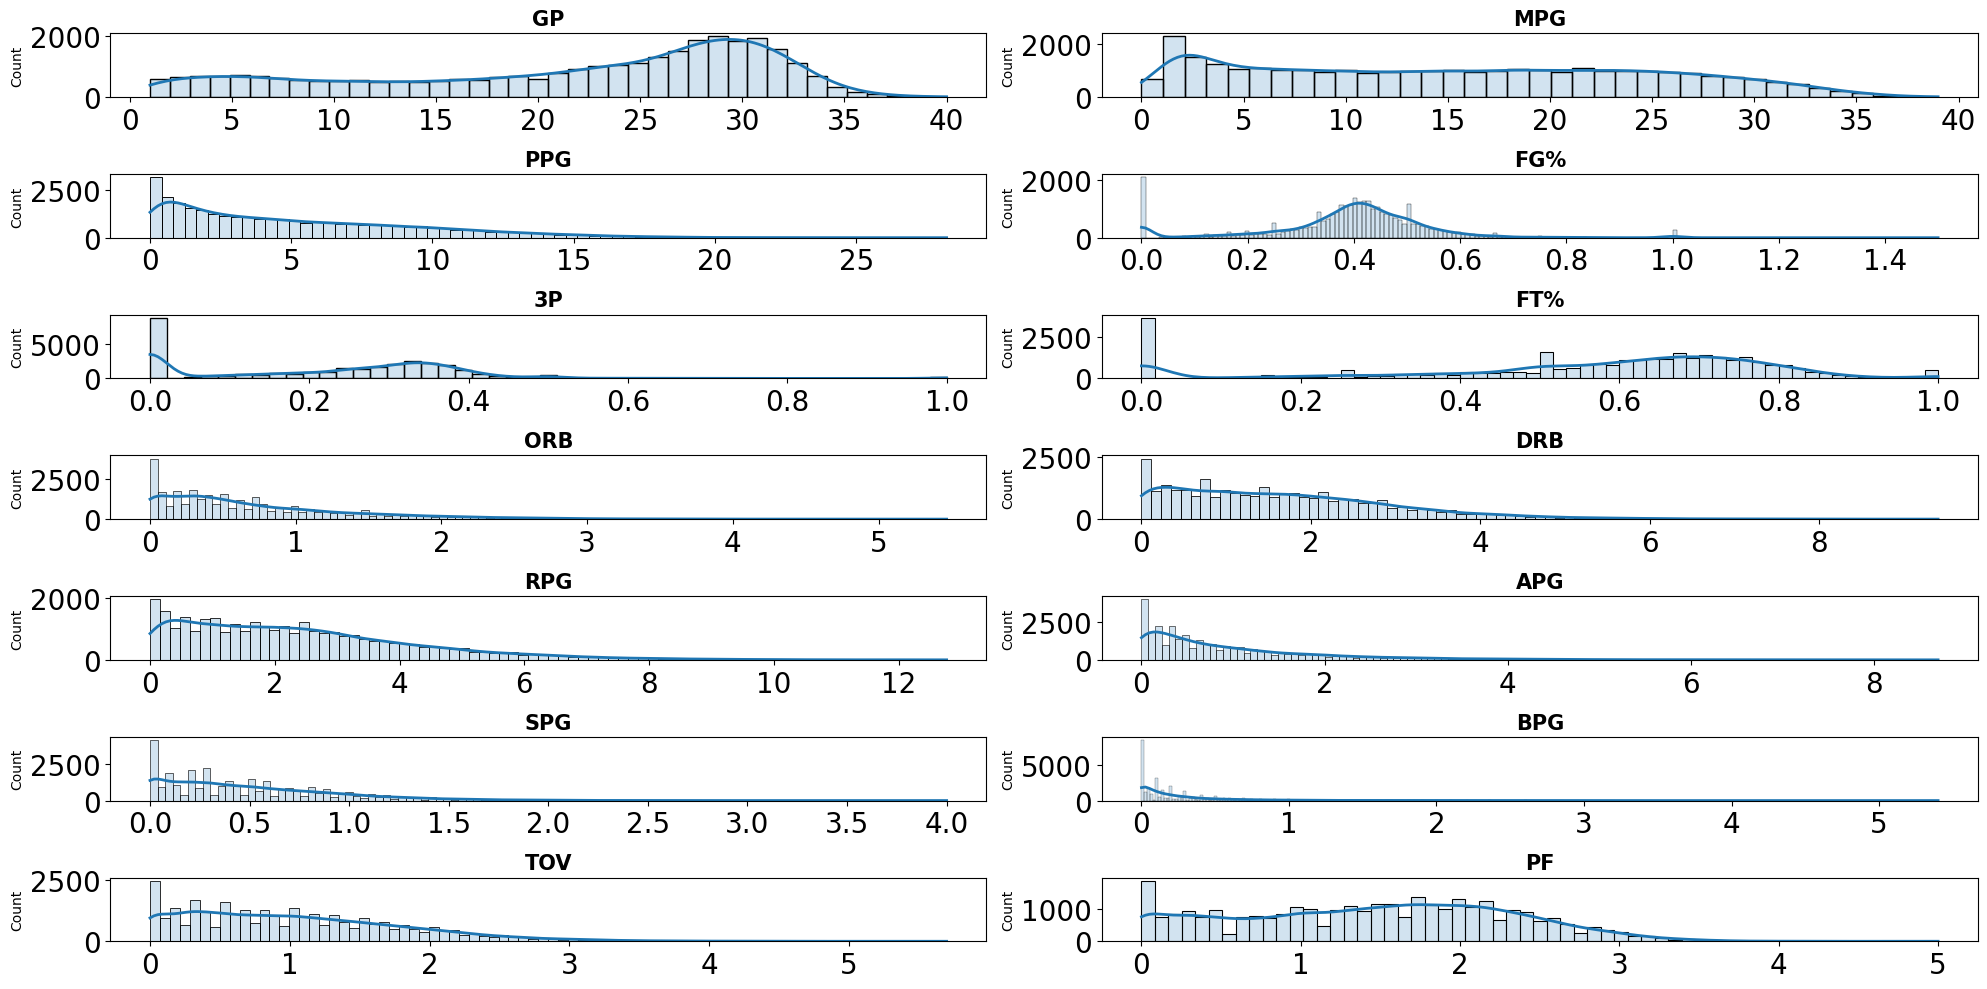

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (20, 10))



axes = axes.flat

columnas_numeric = df.select_dtypes(include = np.number).columns

for i, colum in enumerate(columnas_numeric): 
    sns.histplot(
        data = df,
        x = colum,
        kde = True,  
        line_kws = {"linewidth": 2}, 
        alpha = 0.2, 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 15, fontweight = "bold")
    axes[i].tick_params(labelsize = 20)
    axes[i].set_xlabel("")
    

fig.tight_layout();

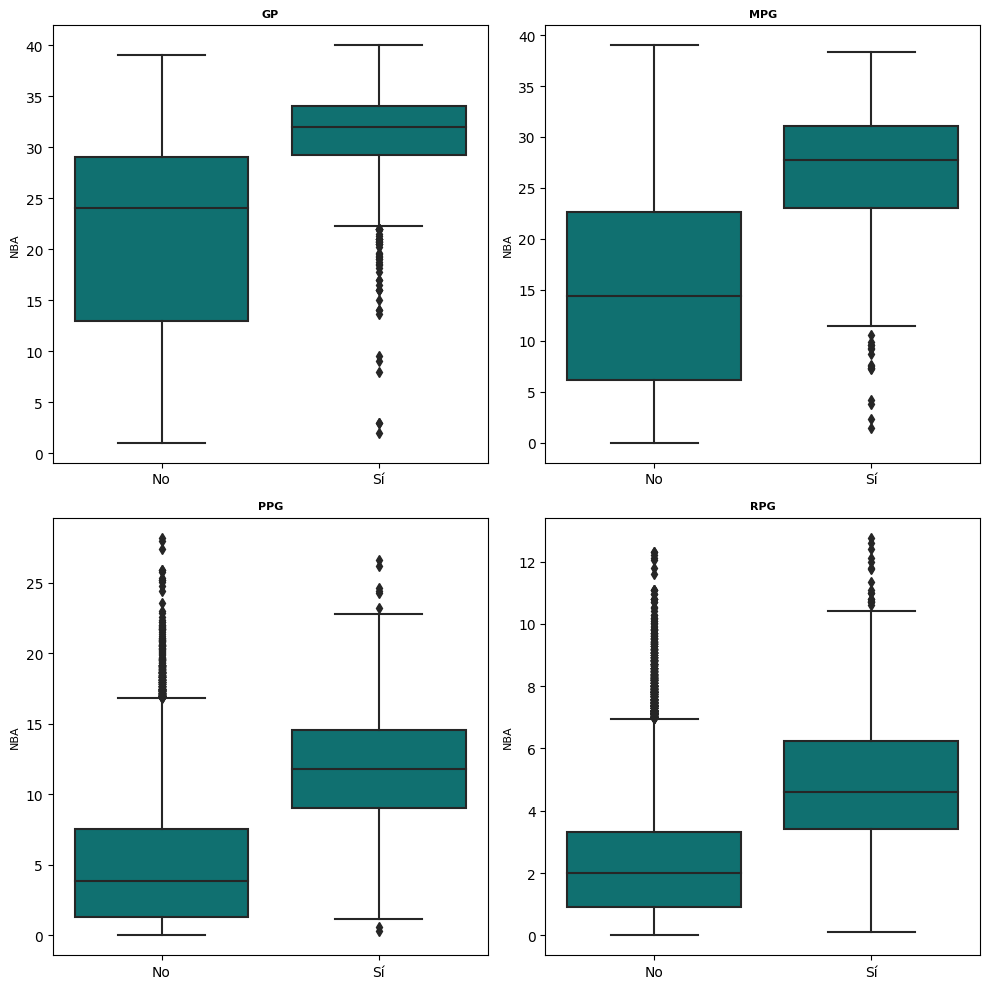

In [17]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))


axes = axes.flat

columnas_num = ["GP","MPG","PPG","RPG"]

for i, colum in enumerate(columnas_num): 
    sns.boxplot(
        data = df,
        x = "NBA",
        y = colum,
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "NBA", fontsize = 8)

#fig.delaxes(axes[-1])

fig.tight_layout();

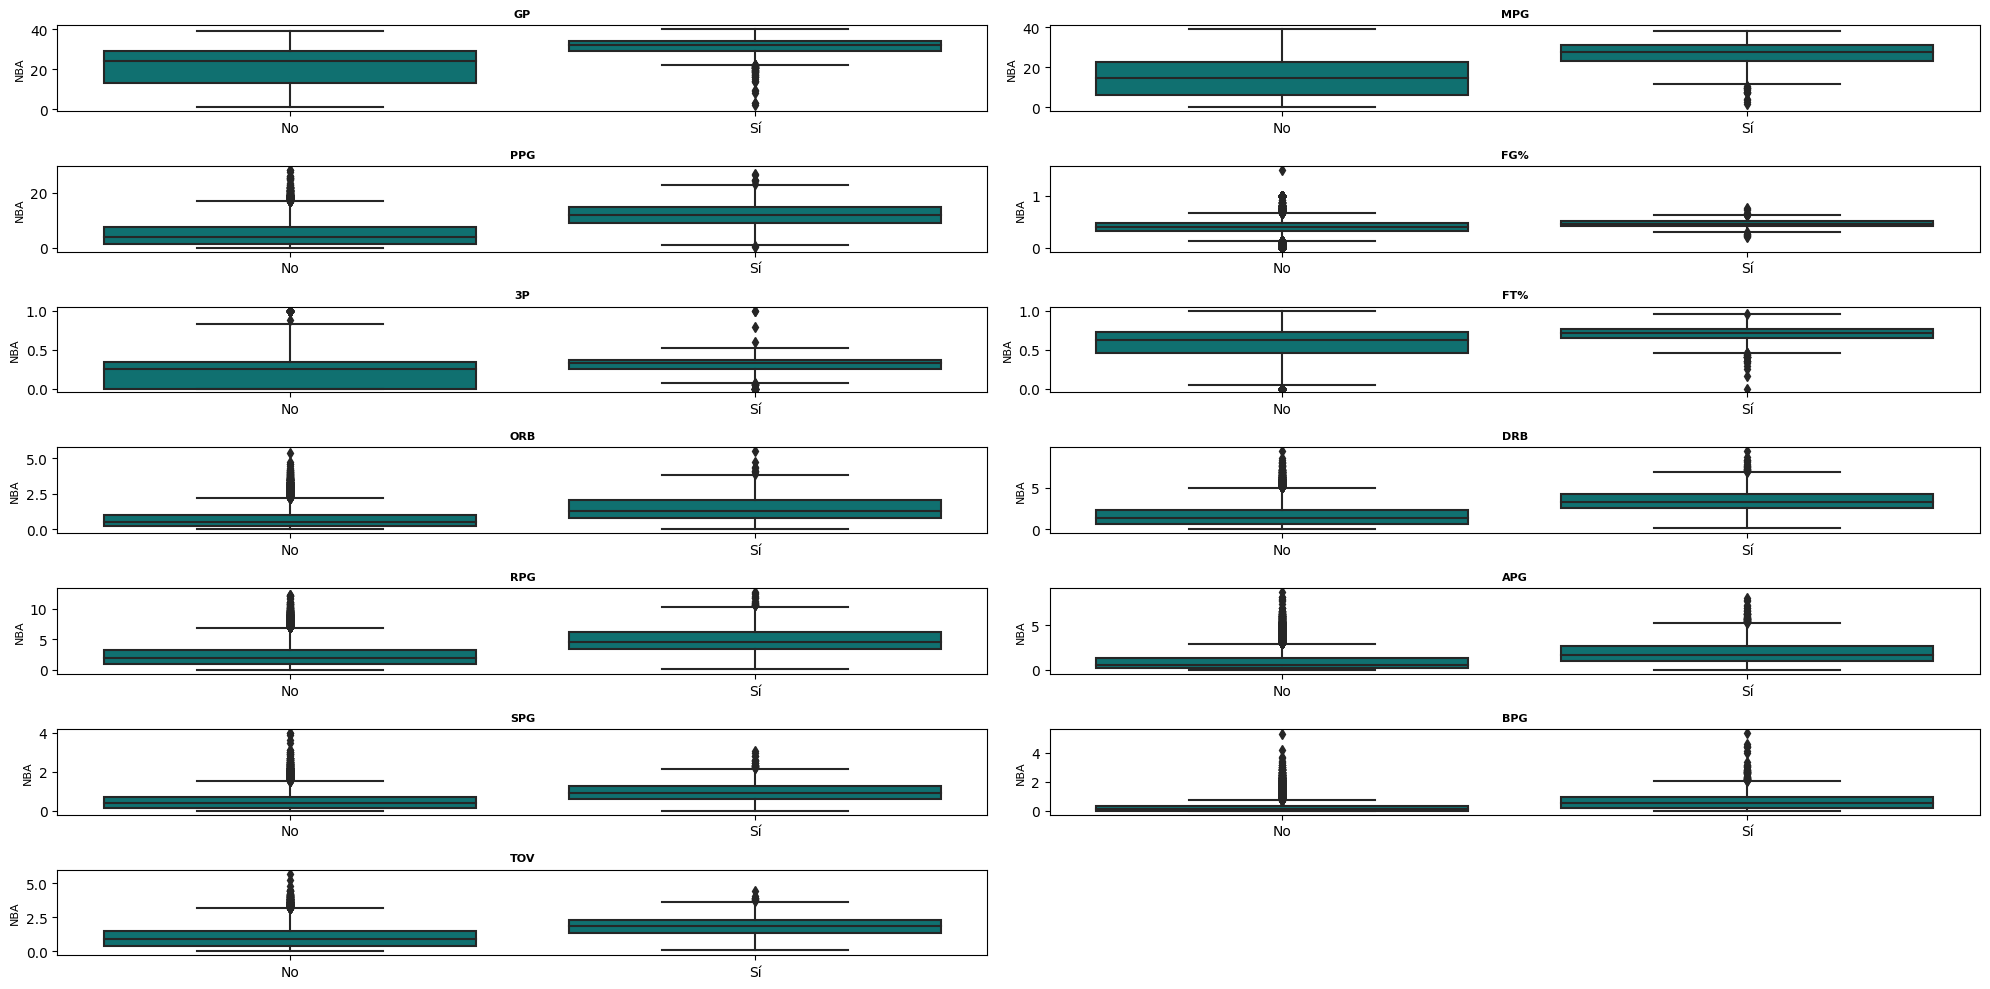

In [11]:
fig, axes = plt.subplots(nrows = 7, ncols = 2, figsize = (20, 10))


axes = axes.flat

columnas_num = df.select_dtypes(exclude= ["object", "category"]).columns

for i, colum in enumerate(columnas_num): 
    sns.boxplot(
        data = df,
        x = "NBA",
        y = colum,
        color = "teal", 
        ax = axes[i])
    
    
    axes[i].set_title(colum, fontsize = 8, fontweight = "bold")
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")
    axes[i].set_ylabel( "NBA", fontsize = 8)

fig.delaxes(axes[-1])

fig.tight_layout();

In [19]:

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder  
from sklearn.preprocessing import OrdinalEncoder

import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [20]:
df

,Player,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,NBA
0,A'Daeron Duncan,33.000000,22.400000,6.200,0.3610,0.25500,0.768000,1.200000,2.500000,3.600000,1.300000,0.900000,0.400,1.600000,1.600000,No
1,A'Torey Everett,24.000000,9.700000,2.400,0.3860,0.57100,0.800000,0.100000,0.800000,0.900000,0.700000,0.100000,0.000,0.800000,1.400000,No
2,A'Torri Shine,29.000000,31.950000,13.300,0.4065,0.31550,0.745500,1.100000,2.700000,3.850000,1.000000,0.800000,0.200,2.200000,2.100000,No
3,A'uston Calhoun,24.750000,22.825000,10.800,0.4245,0.33225,0.679500,1.600000,3.175000,4.775000,0.500000,0.425000,0.425,1.475000,1.725000,No
4,A.B. Lehmann,6.000000,2.300000,0.800,0.5000,0.50000,0.500000,0.000000,0.200000,0.200000,0.200000,0.200000,0.000,0.200000,0.500000,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31452,Zvonko Buljan,31.000000,27.750000,12.250,0.4770,0.30500,0.712500,2.050000,6.150000,8.200000,1.950000,0.800000,0.250,3.150000,2.900000,No
31453,Zygis Sestokas,26.750000,15.000000,3.825,0.3540,0.33500,0.642000,0.425000,0.975000,1.400000,0.300000,0.250000,0.075,0.400000,1.325000,No
31454,Zylan Cheatham,34.333333,25.533333,9.700,0.5270,0.26100,0.696667,1.966667,5.333333,7.333333,1.833333,0.833333,0.700,2.266667,2.566667,Sí
31455,Zyon Dobbs,16.000000,7.100000,1.400,0.3200,0.30800,0.333000,0.100000,0.500000,0.600000,0.500000,0.600000,0.100,0.400000,0.300000,No


In [21]:
df1 = df.copy()

In [22]:
df1.head()

,Player,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,NBA
0,A'Daeron Duncan,33.00,22.400,6.2,0.3610,0.25500,0.7680,1.2,2.500,3.600,1.3,0.900,0.400,1.600,1.600,No
1,A'Torey Everett,24.00,9.700,2.4,0.3860,0.57100,0.8000,0.1,0.800,0.900,0.7,0.100,0.000,0.800,1.400,No
2,A'Torri Shine,29.00,31.950,13.3,0.4065,0.31550,0.7455,1.1,2.700,3.850,1.0,0.800,0.200,2.200,2.100,No
3,A'uston Calhoun,24.75,22.825,10.8,0.4245,0.33225,0.6795,1.6,3.175,4.775,0.5,0.425,0.425,1.475,1.725,No
4,A.B. Lehmann,6.00,2.300,0.8,0.5000,0.50000,0.5000,0.0,0.200,0.200,0.2,0.200,0.000,0.200,0.500,No


In [23]:
orden =  {"Sí":1,
        "No":0}

In [24]:
df1["NBA_map"] = df1["NBA"].map(orden)
df1.head(2)

,Player,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,NBA,NBA_map
0,A'Daeron Duncan,33.0,22.4,6.2,0.361,0.255,0.768,1.2,2.5,3.6,1.3,0.9,0.4,1.6,1.6,No,0
1,A'Torey Everett,24.0,9.7,2.4,0.386,0.571,0.800,0.1,0.8,0.9,0.7,0.1,0.0,0.8,1.4,No,0


In [25]:
df1.head()

,Player,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,NBA,NBA_map
0,A'Daeron Duncan,33.000000,22.4000,6.200000,0.361000,0.255000,0.768000,1.200000,2.500000,3.600000,1.300000,0.900000,0.400000,1.600000,1.600000,No,0
1,A'Torey Everett,24.000000,9.7000,2.400000,0.386000,0.571000,0.800000,0.100000,0.800000,0.900000,0.700000,0.100000,0.000000,0.800000,1.400000,No,0
2,A'Torri Shine,29.000000,31.9500,13.300000,0.406500,0.315500,0.745500,1.100000,2.700000,3.850000,1.000000,0.800000,0.200000,2.200000,2.100000,No,0
3,A'uston Calhoun,24.750000,22.8250,10.800000,0.424500,0.332250,0.679500,1.600000,3.175000,4.775000,0.500000,0.425000,0.425000,1.475000,1.725000,No,0
4,A.B. Lehmann,6.000000,2.3000,0.800000,0.500000,0.500000,0.500000,0.000000,0.200000,0.200000,0.200000,0.200000,0.000000,0.200000,0.500000,No,0
5,A.C. Kelly,4.000000,1.5000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,0.300000,0.000000,0.000000,0.000000,0.300000,0.800000,No,0
6,A.C. Reid,26.500000,18.2500,4.450000,0.279250,0.268750,0.523250,0.100000,1.600000,1.700000,1.150000,0.475000,0.100000,0.975000,1.650000,No,0
7,A.D. Vassallo,33.000000,28.3500,13.550000,0.442250,0.382000,0.788500,0.875000,3.525000,4.400000,1.650000,0.600000,0.475000,1.800000,2.150000,No,0
8,A.J. Abrams,37.000000,21.2000,6.400000,0.401000,0.390000,0.878000,0.400000,1.300000,1.700000,3.000000,0.700000,0.000000,1.600000,1.200000,No,0
9,A.J. Adams,8.000000,5.0000,0.600000,0.400000,0.000000,0.500000,0.100000,0.100000,0.300000,0.000000,0.100000,0.000000,0.000000,0.800000,No,0


In [26]:
#Una vez realizado el encoding para nuestra variable respuesta , ahora vamos a comprobar como estan los datos distribuídos en la misma
#Comprobaremos si está desbalanceada o no.

In [27]:
print(df1["NBA"].value_counts())
print("--------------------------")
print("Se pueden observar claramente que tenemos muchos más datos de No que de Sí")


No    30430
Sí     1027
Name: NBA, dtype: int64
--------------------------
Se pueden observar claramente que tenemos muchos más datos de No que de Sí


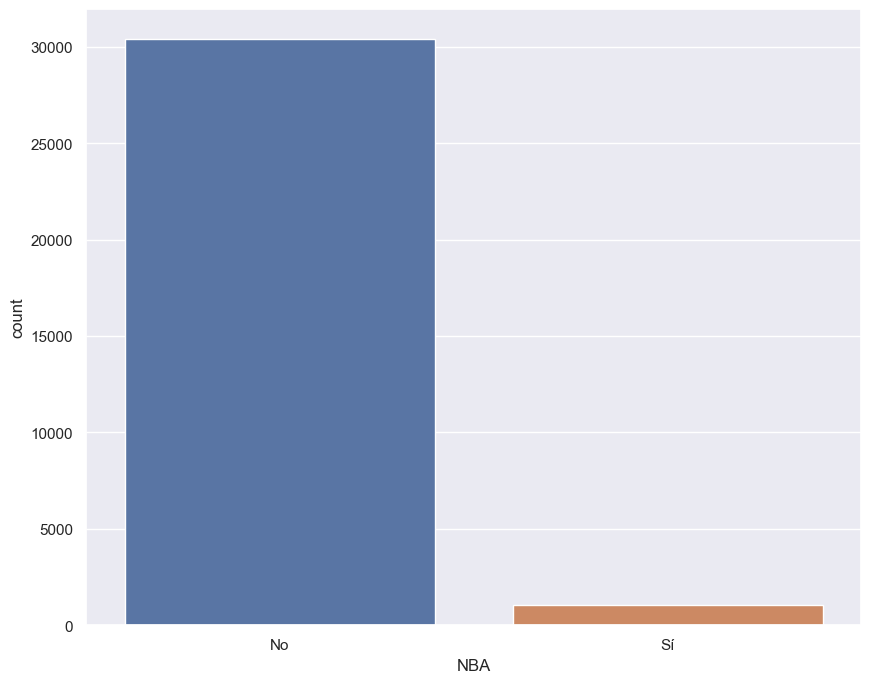

In [28]:
#Veámoslo gráficamente
sns.set_theme(style="darkgrid")
sns.countplot(data = df, x= "NBA");

In [29]:
num_mayoritarios = df1["NBA"].value_counts()["No"]
num_mayoritarios

30430

In [30]:
# seleccionamos ls datos de la clase mayoritaria

mayoritarios2 = df1[df1["NBA"]== "No"]
mayoritarios2.head(2)

,Player,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,NBA,NBA_map
0,A'Daeron Duncan,33.0,22.4,6.2,0.361,0.255,0.768,1.2,2.5,3.6,1.3,0.9,0.4,1.6,1.6,No,0
1,A'Torey Everett,24.0,9.7,2.4,0.386,0.571,0.800,0.1,0.8,0.9,0.7,0.1,0.0,0.8,1.4,No,0


In [31]:
# hacemos un selección aleatoria de datos de la clase minoritaria, para tener el mismo número que la clase mayoritaria

minoritarios2 =df1[df1["NBA"]=="Sí"].sample(num_mayoritarios, replace=True)
minoritarios2.head(2)

,Player,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,NBA,NBA_map
16252,Jordan Mickey,32.5,33.85,14.1,0.519,0.0555,0.6705,2.75,6.15,8.9,1.2,0.75,3.35,2.8,2.4,Sí,1
29110,Tony Bradley,38.0,14.60,7.1,0.573,0.0000,0.6190,2.60,2.60,5.1,0.6,0.30,0.60,0.7,1.8,Sí,1


In [32]:
# unimos los dos dataframes

balanceado2 = pd.concat([mayoritarios2,minoritarios2], axis = 0)
balanceado2.head()

,Player,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,NBA,NBA_map
0,A'Daeron Duncan,33.00,22.400,6.2,0.3610,0.25500,0.7680,1.2,2.500,3.600,1.3,0.900,0.400,1.600,1.600,No,0
1,A'Torey Everett,24.00,9.700,2.4,0.3860,0.57100,0.8000,0.1,0.800,0.900,0.7,0.100,0.000,0.800,1.400,No,0
2,A'Torri Shine,29.00,31.950,13.3,0.4065,0.31550,0.7455,1.1,2.700,3.850,1.0,0.800,0.200,2.200,2.100,No,0
3,A'uston Calhoun,24.75,22.825,10.8,0.4245,0.33225,0.6795,1.6,3.175,4.775,0.5,0.425,0.425,1.475,1.725,No,0
4,A.B. Lehmann,6.00,2.300,0.8,0.5000,0.50000,0.5000,0.0,0.200,0.200,0.2,0.200,0.000,0.200,0.500,No,0


In [33]:
balanceado2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60860 entries, 0 to 17257
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Player   60860 non-null  object 
 1   GP       60860 non-null  float64
 2   MPG      60860 non-null  float64
 3   PPG      60860 non-null  float64
 4   FG%      60860 non-null  float64
 5   3P       60860 non-null  float64
 6   FT%      60860 non-null  float64
 7   ORB      60860 non-null  float64
 8   DRB      60860 non-null  float64
 9   RPG      60860 non-null  float64
 10  APG      60860 non-null  float64
 11  SPG      60860 non-null  float64
 12  BPG      60860 non-null  float64
 13  TOV      60860 non-null  float64
 14  PF       60860 non-null  float64
 15  NBA      60860 non-null  object 
 16  NBA_map  60860 non-null  int64  
dtypes: float64(14), int64(1), object(2)
memory usage: 8.4+ MB


In [34]:
balanceado2.drop(["NBA","Player"],axis=1,inplace=True)

In [35]:
balanceado2.to_csv('PredecirW.csv')

# PREDICCIÓN

In [36]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.model_selection import train_test_split
plt.rcParams["figure.figsize"] = (10,8)

import statsmodels.formula.api as smf


from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree



from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [37]:
df_pred = pd.read_csv("PredecirW.csv")

In [38]:
df_pred.reset_index(inplace=True)

In [39]:
df_pred.drop(["index"],axis=1,inplace=True)

In [40]:
df_pred

,Unnamed: 0,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF,NBA_map
0,0,33.000000,22.400000,6.200000,0.36100,0.255000,0.768000,1.200000,2.500000,3.600,1.300,0.900000,0.400000,1.600000,1.600000,0
1,1,24.000000,9.700000,2.400000,0.38600,0.571000,0.800000,0.100000,0.800000,0.900,0.700,0.100000,0.000000,0.800000,1.400000,0
2,2,29.000000,31.950000,13.300000,0.40650,0.315500,0.745500,1.100000,2.700000,3.850,1.000,0.800000,0.200000,2.200000,2.100000,0
3,3,24.750000,22.825000,10.800000,0.42450,0.332250,0.679500,1.600000,3.175000,4.775,0.500,0.425000,0.425000,1.475000,1.725000,0
4,4,6.000000,2.300000,0.800000,0.50000,0.500000,0.500000,0.000000,0.200000,0.200,0.200,0.200000,0.000000,0.200000,0.500000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60855,11862,18.500000,25.250000,13.700000,0.43250,0.153500,0.702000,1.900000,3.500000,5.400,1.350,0.800000,0.250000,2.200000,3.050000,1
60856,29534,35.000000,25.500000,13.525000,0.42600,0.349250,0.687500,2.100000,3.700000,5.775,1.450,0.800000,0.225000,1.375000,2.150000,1
60857,16961,34.500000,30.700000,5.750000,0.40975,0.263000,0.614750,0.675000,4.750000,5.450,5.175,1.525000,0.450000,1.925000,2.275000,1
60858,1692,34.750000,24.575000,10.400000,0.55050,0.348250,0.674000,2.100000,3.250000,5.325,0.800,0.575000,0.475000,1.225000,2.275000,1


In [41]:
new_columns = ["index","GP", "MPG", "PPG","FG%", "3P","FT%", "ORB", "DRB", "RPG", "APG",
               "SPG", "BPG", "TOV", "PF","NBA"]

In [42]:
def rename_columns(df, new_columns):
    """
    Esta función toma un dataframe y una lista de nuevas etiquetas de columna
    y devuelve el dataframe con las nuevas etiquetas de columna aplicadas.
    """
    df = df.rename(columns=dict(zip(df.columns, new_columns)))
    return df

In [43]:
df_pred = rename_columns(df_pred, new_columns)

In [44]:
df_pred.drop(["index"],axis=1,inplace=True)

In [82]:
df_pred.to_csv('readytopredict.csv')

In [46]:
df_pred["NBA"].value_counts()


0    30430
1    30430
Name: NBA, dtype: int64

In [47]:
# Reparto de datos en train y test
# ==============================================================================
# lo primero que hacemos es definir cual es nuestra variable Y y nuestras variables X
X = df_pred.drop('NBA', axis =1)
y = df_pred['NBA']

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size   = 0.8, random_state = 42)

In [49]:
print("Datos de entrenamiento")
print("-----------------------")
print(y_train.describe())

Datos de entrenamiento
-----------------------
count    48688.000000
mean         0.498480
std          0.500003
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: NBA, dtype: float64


In [50]:
print("Datos de testeo")
print("-----------------------")
print(y_test.describe())

Datos de testeo
-----------------------
count    12172.000000
mean         0.506080
std          0.499984
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: NBA, dtype: float64


# Creación  del modelo

# ·DecisionTree.


In [51]:
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0) 

In [52]:
X_test

,GP,MPG,PPG,FG%,3P,FT%,ORB,DRB,RPG,APG,SPG,BPG,TOV,PF
5476,27.000000,13.200,4.400000,0.419000,0.360000,0.571000,0.600000,1.400000,2.000000,0.900,0.300,0.100000,1.300000,1.600000
15020,21.500000,6.400,1.300000,0.470000,0.000000,0.300000,0.450000,0.900000,1.300000,0.000,0.100,0.200000,0.300000,1.550000
9634,7.000000,15.000,4.600000,0.462000,0.000000,0.727000,0.400000,3.400000,3.900000,0.300,0.900,0.400000,1.600000,2.400000
51302,35.000000,27.200,11.800000,0.406000,0.308000,0.625000,0.700000,4.200000,4.900000,2.300,1.300,0.700000,1.700000,2.300000
16974,29.666667,29.700,10.066667,0.429000,0.312333,0.790667,0.800000,2.666667,3.466667,3.100,1.400,0.300000,2.133333,2.466667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44800,31.666667,27.600,15.666667,0.517333,0.262000,0.717000,2.233333,5.133333,7.366667,1.200,0.500,1.633333,2.200000,2.833333
14240,30.000000,24.475,8.250000,0.565750,0.100000,0.602750,2.275000,4.150000,6.400000,1.450,0.950,1.825000,1.850000,2.600000
39345,34.500000,29.775,16.150000,0.499000,0.377750,0.759000,1.150000,4.000000,5.175000,3.025,0.675,0.475000,2.300000,3.050000
12371,10.000000,4.100,0.900000,0.429000,0.000000,0.750000,0.300000,0.500000,0.800000,0.200,0.000,0.000000,0.100000,0.600000


In [53]:
regressor.fit(X_train, y_train)


DecisionTreeRegressor(random_state=0)

In [54]:
# sacamos las mejores métricas 

In [55]:
# max features

max_features = np.sqrt(len(X_train.columns))
max_features

3.7416573867739413

In [56]:
# max depth

print(regressor.tree_.max_depth)

45


In [57]:
# hacemos las predicciones sobre los dos set de datos el X_test y el X_train
y_pred_test_dt = regressor.predict(X_test)
y_pred_train_dt = regressor.predict(X_train)

In [58]:
def metricas(y_test, y_train, y_test_pred, y_train_pred, tipo_modelo):
    
    
    resultados = {'MAE': [metrics.mean_absolute_error(y_test, y_test_pred), metrics.mean_absolute_error(y_train, y_train_pred)],
                'MSE': [metrics.mean_squared_error(y_test, y_test_pred), metrics.mean_squared_error(y_train, y_train_pred)],
                'RMSE': [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_train, y_train_pred))],
                'R2':  [metrics.r2_score(y_test, y_test_pred), metrics.r2_score(y_train, y_train_pred)],
                 "set": ["test", "train"]}
    df = pd.DataFrame(resultados)
    df["modelo"] = tipo_modelo
    return df

In [59]:
# sacamos las métricas para ver si hay overfitting

dt_results1 = metricas(y_test, y_train, y_pred_test_dt, y_pred_train_dt, "Decission Tree I")
dt_results1

,MAE,MSE,RMSE,R2,set,modelo
0,0.013309,0.013309,0.115366,0.946755,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I


In [60]:
# Generación del GridSearch
# ==============================================================================

# definimos un diccionario con los hiperparámetros que queremos testear. 
param = {"max_depth": [42],
        "min_samples_split": [10, 50, 100],
        "max_features": [1,2,3,4]}

gs = GridSearchCV(
            estimator=DecisionTreeRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [61]:
# ajustamos el modelo de nuevo

%time
gs.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [42], 'max_features': [1, 2, 3, 4],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [62]:
# sacamos cual es el mejor de todos los que hemos testeado usando el método best_estimator_

best_tree = gs.best_estimator_
best_tree

DecisionTreeRegressor(max_depth=42, max_features=3, min_samples_split=10)

In [63]:
y_pred_test_dt2 = best_tree.predict(X_test)
y_pred_train_dt2 = best_tree.predict(X_train)

In [64]:
dt_results2 = metricas(y_test, y_train, y_pred_test_dt2, y_pred_train_dt2, "Decision tree II")

In [65]:
dt_results2

,MAE,MSE,RMSE,R2,set,modelo
0,0.013145,0.013145,0.114651,0.947413,test,Decision tree II
1,0.000000,0.000000,0.000000,1.000000,train,Decision tree II


In [66]:
df_all = pd.concat([dt_results1, dt_results2], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.013309,0.013309,0.115366,0.946755,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,0.013145,0.013145,0.114651,0.947413,test,Decision tree II
1,0.000000,0.000000,0.000000,1.000000,train,Decision tree II


In [67]:
importancia_predictores = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': regressor.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,GP,0.102491
1,MPG,0.036574
2,PPG,0.449810
3,FG%,0.041429
4,3P,0.029017
5,FT%,0.033956
6,ORB,0.013932
7,DRB,0.023787
8,RPG,0.037413
9,APG,0.035944


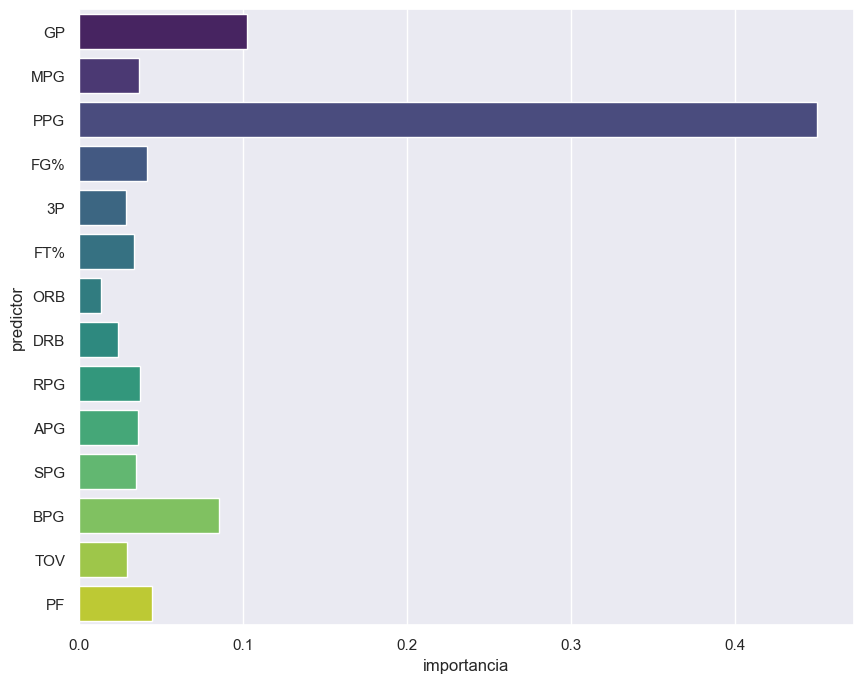

In [68]:
# Vamos a ver esto gráficamente para podoer entenderlo mejor.
sns.barplot(x = "importancia", y = "predictor", data = importancia_predictores, palette="viridis");

# ·Random Forest

In [69]:
bosque = GridSearchCV(
            estimator=RandomForestRegressor(),
            param_grid= param,
            cv=10,
            verbose=0,
            n_jobs = -1,
            return_train_score = True,
            scoring="neg_mean_squared_error")

In [70]:
%time
bosque.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 0 ns


GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [42], 'max_features': [1, 2, 3, 4],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [71]:
bos = bosque.best_estimator_

In [72]:
bos

RandomForestRegressor(max_depth=42, max_features=1, min_samples_split=10)

In [73]:
y_pred_test_rf = bos.predict(X_test)
y_pred_train_rf = bos.predict(X_train)

In [74]:
rf_results = metricas(y_test, y_train, y_pred_test_rf, y_pred_train_rf, "Random Forest")
rf_results

,MAE,MSE,RMSE,R2,set,modelo
0,0.021565,0.004213,0.064904,0.983147,test,Random Forest
1,0.008572,0.000674,0.025969,0.997302,train,Random Forest


In [75]:
df_all = pd.concat([df_all, rf_results ], axis = 0)
df_all

,MAE,MSE,RMSE,R2,set,modelo
0,0.013309,0.013309,0.115366,0.946755,test,Decission Tree I
1,0.000000,0.000000,0.000000,1.000000,train,Decission Tree I
0,0.013145,0.013145,0.114651,0.947413,test,Decision tree II
1,0.000000,0.000000,0.000000,1.000000,train,Decision tree II
0,0.021565,0.004213,0.064904,0.983147,test,Random Forest
1,0.008572,0.000674,0.025969,0.997302,train,Random Forest


In [76]:
importancia_predictores_rf = pd.DataFrame(
                            {'predictor': X_train.columns,
                             'importancia': bos.feature_importances_}
                            )
print("Importancia de los predictores en el modelo")
print("-------------------------------------------")
importancia_predictores_rf

Importancia de los predictores en el modelo
-------------------------------------------


,predictor,importancia
0,GP,0.083319
1,MPG,0.076978
2,PPG,0.113561
3,FG%,0.067190
4,3P,0.042771
5,FT%,0.049383
6,ORB,0.064780
7,DRB,0.078179
8,RPG,0.081391
9,APG,0.055410


In [77]:
grid = GridSearchCV(
        estimator  = GradientBoostingClassifier(),
        param_grid = param,
        n_jobs     = -1,
        verbose    = 1,
        cv         = 10, 
        return_train_score = True
       )

grid.fit(X = X_train, y = y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


GridSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': [42], 'max_features': [1, 2, 3, 4],
                         'min_samples_split': [10, 50, 100]},
             return_train_score=True, verbose=1)

In [78]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_)

----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': 42, 'max_features': 1, 'min_samples_split': 10}


In [79]:
y_pred_gb_test= grid.predict(X_test)
y_pred_gb_train= grid.predict(X_train)

In [80]:
# vamos a hacernos una función
def metricas(clases_reales_test, clases_predichas_test, clases_reales_train, clases_predichas_train, modelo):
    
    # para el test
    accuracy_test = accuracy_score(clases_reales_test, clases_predichas_test)
    precision_test = precision_score(clases_reales_test, clases_predichas_test)
    recall_test = recall_score(clases_reales_test, clases_predichas_test)
    f1_test = f1_score(clases_reales_test, clases_predichas_test)
    kappa_test = cohen_kappa_score(clases_reales_test, clases_predichas_test)

    # para el train
    accuracy_train = accuracy_score(clases_reales_train, clases_predichas_train)
    precision_train = precision_score(clases_reales_train, clases_predichas_train)
    recall_train = recall_score(clases_reales_train, clases_predichas_train)
    f1_train = f1_score(clases_reales_train, clases_predichas_train)
    kappa_train = cohen_kappa_score(clases_reales_train, clases_predichas_train)
    

    
    df = pd.DataFrame({"accuracy": [accuracy_test, accuracy_train], 
                       "precision": [precision_test, precision_train],
                       "recall": [recall_test, recall_train], 
                       "f1": [f1_test, f1_train],
                       "kapppa": [kappa_test, kappa_train],
                       "set": ["test", "train"]})
    
    df["modelo"] = modelo
    return df

In [81]:
results_decission_tree1 = metricas(y_test, y_pred_test_dt,y_train, y_pred_train_dt, "Decission Tree I" )
results_decission_tree1

NameError: name 'accuracy_score' is not defined